In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('/content/dados_juntos.csv')
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2.0
1,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2.0
2,25.0,125000.0,Own,9.0,Personal,B,25000.0,10.59,0.0,0.20,N,2.0
3,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y,3.0
4,23.0,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0.0,0.10,Y,2.0


In [5]:
# Renomeando as colunas do DataFrame
dados = dados.rename(columns={
    'person_age': 'idade_pessoa',
    'person_income': 'renda_pessoa',
    'person_home_ownership': 'propriedade_casa_pessoa',
    'person_emp_length': 'tempo_emprego_pessoa',
    'loan_intent': 'intencao_emprestimo',
    'loan_grade': 'grau_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros_emprestimo',
    'loan_status': 'status_emprestimo',
    'loan_percent_income': 'percentual_renda_emprestimo',
    'cb_person_default_on_file': 'inadimplente_pessoa',
    'cb_person_cred_hist_length': 'tempo_historico_credito_pessoa'
    })

In [6]:
dados.shape

(34501, 12)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idade_pessoa                    34177 non-null  float64
 1   renda_pessoa                    34162 non-null  float64
 2   propriedade_casa_pessoa         34170 non-null  object 
 3   tempo_emprego_pessoa            33247 non-null  float64
 4   intencao_emprestimo             34186 non-null  object 
 5   grau_emprestimo                 34188 non-null  object 
 6   valor_emprestimo                34170 non-null  float64
 7   taxa_juros_emprestimo           30871 non-null  float64
 8   status_emprestimo               34158 non-null  float64
 9   percentual_renda_emprestimo     34182 non-null  float64
 10  inadimplente_pessoa             34131 non-null  object 
 11  tempo_historico_credito_pessoa  34497 non-null  float64
dtypes: float64(8), object(4)
memory 

In [8]:
#Verificando a quantidade de valores nulos por colunas
dados.isnull().sum()

,0
idade_pessoa,324
renda_pessoa,339
propriedade_casa_pessoa,331
tempo_emprego_pessoa,1254
intencao_emprestimo,315
grau_emprestimo,313
valor_emprestimo,331
taxa_juros_emprestimo,3630
status_emprestimo,343
percentual_renda_emprestimo,319


In [9]:
dados.describe()

,idade_pessoa,renda_pessoa,tempo_emprego_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,tempo_historico_credito_pessoa
count,34177.000000,3.416200e+04,33247.000000,34170.000000,30871.00000,34158.000000,34182.000000,34497.000000
mean,27.731018,6.602869e+04,4.787229,9590.576529,11.01363,0.218192,0.170227,5.808186
std,6.345281,6.140506e+04,4.137463,6320.429041,3.24124,0.413024,0.106783,4.063231
min,20.000000,4.000000e+03,0.000000,500.000000,5.42000,0.000000,0.000000,2.000000
25%,23.000000,3.849300e+04,2.000000,5000.000000,7.90000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.99000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.47000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.22000,1.000000,0.830000,30.000000


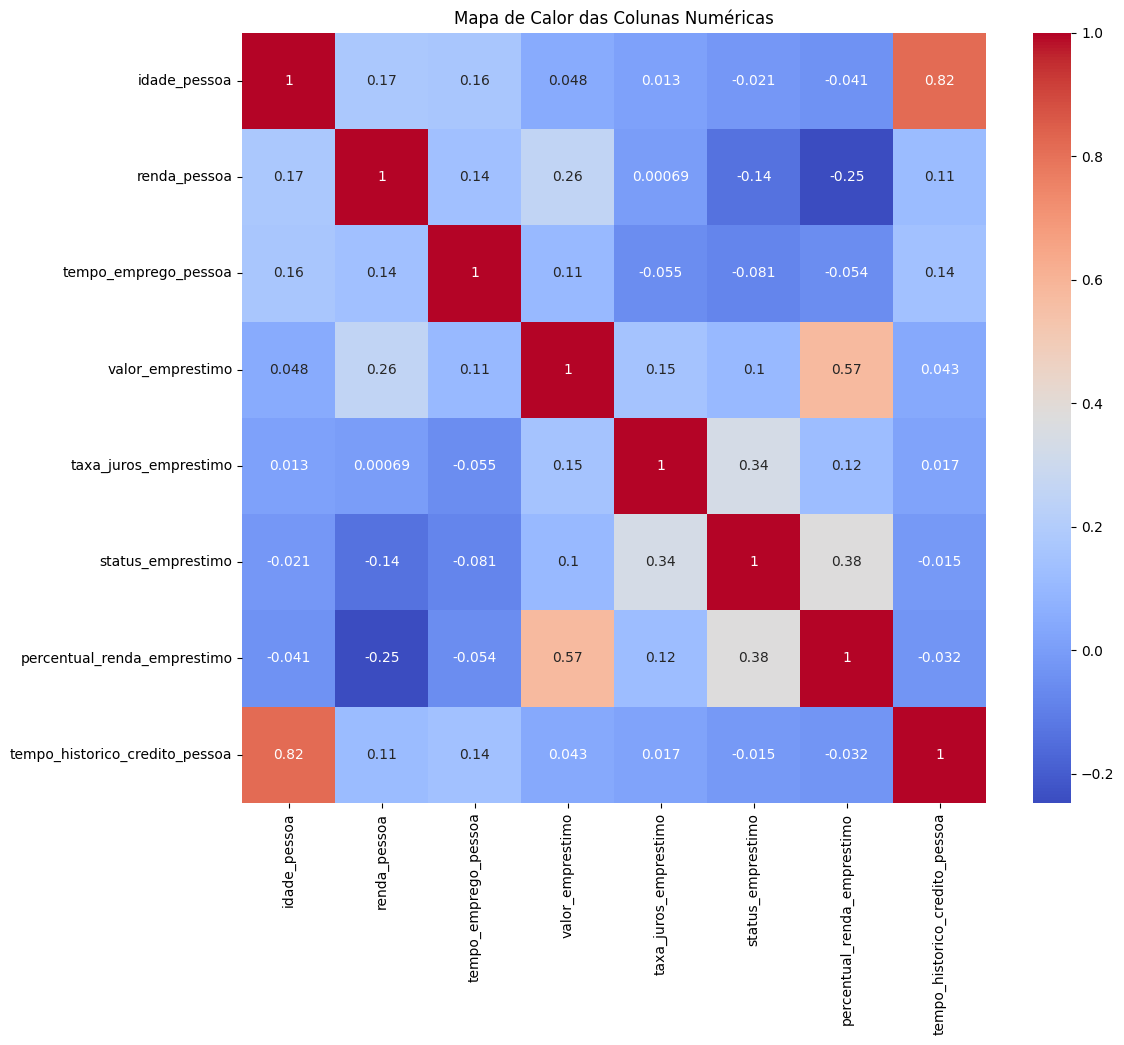

In [10]:
# heat map de colunas numericas

# Selecionar apenas as colunas numéricas
numeric_cols = dados.select_dtypes(include=np.number)

# Criar o mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Colunas Numéricas')
plt.show()


tempo_historico_credito_pessoa e idade_pessoa estao altamente correlacionadas. Sendo assim , eremos fazer a retirada da coluna tempo_historico_credito_pessoa

In [11]:
#drop tempo_historico_credito_pessoa

dados = dados.drop('tempo_historico_credito_pessoa', axis=1)

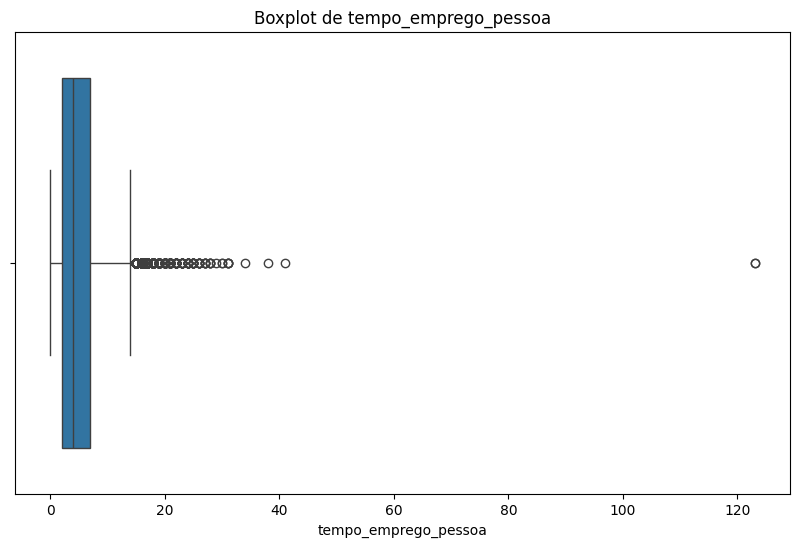

In [12]:
#box plot person_emp_length
plt.figure(figsize=(10, 6))
sns.boxplot(x='tempo_emprego_pessoa', data=dados)
plt.title('Boxplot de tempo_emprego_pessoa')
plt.show()

In [13]:
#filtro person_emp_length acima de 60

dados_filtrados = dados[dados['tempo_emprego_pessoa'] > 60]
dados_filtrados

,idade_pessoa,renda_pessoa,propriedade_casa_pessoa,tempo_emprego_pessoa,intencao_emprestimo,grau_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,inadimplente_pessoa
7074,22.0,59000.0,Rent,123.0,Personal,D,35000.0,16.02,1.0,0.59,Y
8954,21.0,192000.0,Mortgage,123.0,Venture,A,20000.0,6.54,0.0,0.10,N


In [14]:
# Calcula a média de tempo_emprego_pessoa para idade_pessoa entre 20 e 22 e arredonda o resultado
media_emprego = round(dados[(dados['idade_pessoa'] >= 20) & (dados['idade_pessoa'] <= 22)]['tempo_emprego_pessoa'].mean())
media_emprego

4

In [15]:
# Substitui os valores de 'tempo_emprego_pessoa' maiores que 100 pela média calculada
dados.loc[dados['tempo_emprego_pessoa'] > 100, 'tempo_emprego_pessoa'] = media_emprego

In [16]:
dados.idade_pessoa.describe()

,idade_pessoa
count,34177.000000
mean,27.731018
std,6.345281
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,144.000000


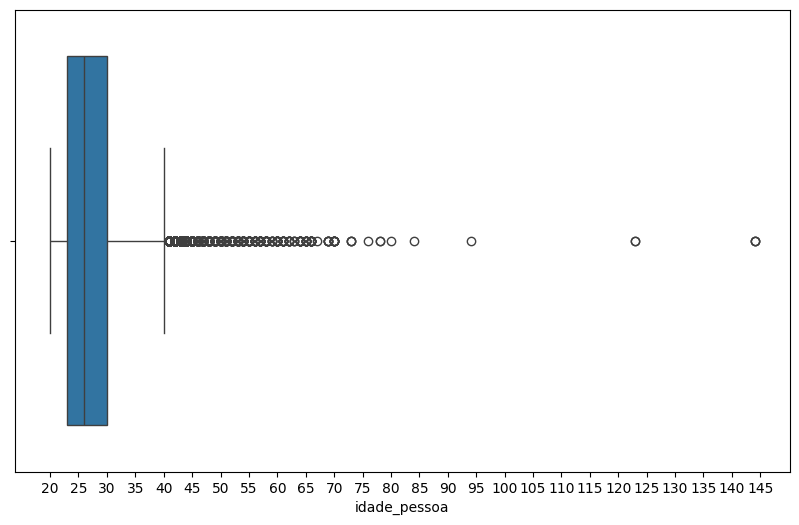

In [17]:
# box plotde age, escala de 5 em 5 , comecando no 20
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['idade_pessoa'])
plt.xticks(np.arange(20, dados['idade_pessoa'].max() + 5, 5))
plt.show()


In [18]:
# Filtrar linhas onde 'idade_pessoa' é maior que 100
filtro_idade = dados[dados['idade_pessoa'] > 100]
filtro_idade

,idade_pessoa,renda_pessoa,propriedade_casa_pessoa,tempo_emprego_pessoa,intencao_emprestimo,grau_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,inadimplente_pessoa
180,144.0,200000.0,Mortgage,4.0,Education,B,6000.0,11.86,0.0,0.03,N
11559,144.0,250000.0,Rent,4.0,Venture,C,4800.0,13.57,0.0,0.02,N
23338,123.0,78000.0,Rent,7.0,Venture,B,20000.0,NaN,0.0,0.26,N
30413,144.0,6000000.0,Mortgage,12.0,Personal,C,5000.0,12.73,0.0,0.00,N
33098,123.0,80004.0,Rent,2.0,Education,B,20400.0,10.25,0.0,0.25,N


In [19]:
# Filtrar linhas onde 'idade_pessoa' é igual a 20 e menor que 25
filtro_idade_40_45 = dados[(dados['idade_pessoa'] >= 20) & (dados['idade_pessoa'] < 25)]
filtro_idade_40_45.head()

,idade_pessoa,renda_pessoa,propriedade_casa_pessoa,tempo_emprego_pessoa,intencao_emprestimo,grau_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,inadimplente_pessoa
1,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N
3,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y
4,23.0,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0.0,0.10,Y
9,22.0,70800.0,Rent,6.0,Education,C,10000.0,12.61,0.0,0.14,Y
10,22.0,45000.0,Rent,1.0,Venture,E,10000.0,NaN,1.0,0.22,N


Suspeita-se que idades acima de 100 anos sejam erros de digitação, onde um dígito "1" foi adicionado erroneamente no início. Essa suspeita é reforçada por:

Renda compatível: A renda dos outliers de idade (ex: 123 anos) é similar à de faixas etárias mais jovens (ex: 20-25 anos ou a idade corrigida, como 23 anos para o caso de 123).
Tempo de trabalho inconsistente: O tempo de trabalho registrado para os outliers é irreal para a idade indicada (ex: 2 anos para alguém de 123 anos), mas faz sentido se considerarmos a idade corrigida (ex: 23 anos).

Conclusão:

É altamente provável que as idades acima de 100 anos sejam erros de digitação, onde um "1" extra foi adicionado. A análise da renda e do tempo de trabalho corrobora essa hipótese, mostrando que os dados se tornam coerentes quando o primeiro dígito "1" é removido das idades problemáticas.

In [20]:
# Subtraia 100 das idades maiores que 100
dados.loc[dados['idade_pessoa'] > 100, 'idade_pessoa'] = dados['idade_pessoa'] - 100

dados.idade_pessoa.describe()

,idade_pessoa
count,34177.000000
mean,27.716388
std,6.210403
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,94.000000


In [21]:
dados.isnull().sum()

,0
idade_pessoa,324
renda_pessoa,339
propriedade_casa_pessoa,331
tempo_emprego_pessoa,1254
intencao_emprestimo,315
grau_emprestimo,313
valor_emprestimo,331
taxa_juros_emprestimo,3630
status_emprestimo,343
percentual_renda_emprestimo,319


# TAXA DE JUROS POR EMPRESTIMO
É uma coluna com bastante dados faltantes. Porem ,podemos utilizar uma regreção  para podermos preencher esses valores vazios com valores que sejam mais proximos .

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression  # Usando regressão linear simples
from sklearn.metrics import mean_squared_error , r2_score

# Passo 1: Remover valores nulos nas colunas preditoras
dados_limpos = dados.dropna(subset=['valor_emprestimo', 'grau_emprestimo'])

# Passo 2: Aplicar o OrdinalEncoder na coluna grau_emprestimo
ord_encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])  # A é bom e G é ruim
dados_limpos['grau_emprestimo_encoded'] = ord_encoder.fit_transform(dados_limpos[['grau_emprestimo']])

# Passo 3: Separar os dados em dois grupos
# Grupo 1: Onde taxa_juros_emprestimo é nulo (para prever depois)
dados_missing = dados_limpos[dados_limpos['taxa_juros_emprestimo'].isna()]

# Grupo 2: Onde temos taxa_juros_emprestimo para treinar o modelo
dados_completos = dados_limpos.dropna(subset=['taxa_juros_emprestimo'])

# Separando os dados para treino e validação (80% treino, 20% validação)
X = dados_completos[['valor_emprestimo', 'grau_emprestimo_encoded']]
y = dados_completos['taxa_juros_emprestimo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Treinar uma regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Validar o modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) no conjunto de validação: {mse}')

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score no conjunto de validação: {r2}')

Mean Squared Error (MSE) no conjunto de validação: 1.8434547655419067
R² Score no conjunto de validação: 0.8236014150435268


<ipython-input-22-1d0b307518ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['grau_emprestimo_encoded'] = ord_encoder.fit_transform(dados_limpos[['grau_emprestimo']])


Conseguimos um R2 bom e um MSE baixo .
Iremos imputar as previsoes na coluna taxa_juros_emprestimo, será de mais valor termos dados proximos doque excluir completamente esses dados .  

In [23]:
# Prevendo os valores missing para taxa_juros_emprestimo
X_missing = dados_missing[['valor_emprestimo', 'grau_emprestimo_encoded']]

dados_missing['taxa_juros_emprestimo_predito'] = modelo.predict(X_missing)

<ipython-input-23-d46ff0c70b19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_missing['taxa_juros_emprestimo_predito'] = modelo.predict(X_missing)


In [24]:
# Substituir os valores missing pelos previstos
dados_limpos.loc[dados_limpos['taxa_juros_emprestimo'].isna(), 'taxa_juros_emprestimo'] = dados_missing['taxa_juros_emprestimo_predito']

In [25]:
X_missing_limpos = dados_limpos[['valor_emprestimo', 'grau_emprestimo_encoded']]  # definindo variaveis preditoras do df dados_limpos
dados_limpos['taxa_juros_emprestimo_predito'] = modelo.predict(X_missing_limpos) #cria uma nova coluna com a previsao que usa os dados acima do df

<ipython-input-25-a4336fe8ae1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['taxa_juros_emprestimo_predito'] = modelo.predict(X_missing_limpos) #cria uma nova coluna com a previsao que usa os dados acima do df


In [26]:
#filtro onde 'taxa_juros_emprestimo_predito' seja igual a taxa_juros_emprestimo'

filtro_iguais = dados_limpos[dados_limpos['taxa_juros_emprestimo_predito'] == dados_limpos['taxa_juros_emprestimo']]
filtro_iguais


,idade_pessoa,renda_pessoa,propriedade_casa_pessoa,tempo_emprego_pessoa,intencao_emprestimo,grau_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_emprestimo,percentual_renda_emprestimo,inadimplente_pessoa,grau_emprestimo_encoded,taxa_juros_emprestimo_predito
10,22.0,45000.0,Rent,1.0,Venture,E,10000.0,17.985096,1.0,0.22,N,4.0,17.985096
17,29.0,175000.0,Mortgage,2.0,Homeimprovement,A,10000.0,7.964523,0.0,0.06,N,0.0,7.964523
24,23.0,71500.0,Rent,3.0,Debtconsolidation,D,30000.0,15.635608,1.0,0.42,N,3.0,15.635608
56,24.0,67000.0,Own,3.0,Venture,C,13000.0,12.998158,0.0,0.19,Y,2.0,12.998158
74,25.0,55000.0,Mortgage,10.0,Education,C,15000.0,13.013723,0.0,0.27,Y,2.0,13.013723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,47.0,24000.0,Mortgage,4.0,Homeimprovement,D,5100.0,15.441817,0.0,0.21,Y,3.0,15.441817
34478,28.0,60000.0,Own,5.0,Medical,B,20000.0,10.547494,0.0,0.33,N,1.0,10.547494
34481,26.0,75000.0,Rent,3.0,Education,A,20000.0,8.042351,0.0,0.27,N,0.0,8.042351
34489,39.0,403750.0,Mortgage,10.0,Medical,B,35000.0,10.664236,1.0,0.07,N,1.0,10.664236


In [27]:
# taxa_juros_emprestimo_predito drop

dados_limpos = dados_limpos.drop('taxa_juros_emprestimo_predito', axis=1)

In [28]:
# soma valores nulos

dados_limpos.isnull().sum()

,0
idade_pessoa,268
renda_pessoa,277
propriedade_casa_pessoa,276
tempo_emprego_pessoa,1180
intencao_emprestimo,243
grau_emprestimo,0
valor_emprestimo,0
taxa_juros_emprestimo,0
status_emprestimo,285
percentual_renda_emprestimo,263


In [29]:
# Calcular o total de valores nulos
total_nulos = dados_limpos.isnull().sum().sum()

# Calcular o total de valores no DataFrame
total_valores = dados_limpos.size

# Calcular o percentual de valores nulos
percentual_nulos = (total_nulos / total_valores) * 100

print(f'Percentual total de valores nulos: {percentual_nulos:.2f}%')

Percentual total de valores nulos: 0.76%


Como agora temos um valor muito baixo de valores faltantes , iremos apenas remove-los

In [30]:
dados_limpos.dropna(inplace=True)
dados_limpos.reset_index(drop=True, inplace=True)

In [31]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31705 entries, 0 to 31704
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade_pessoa                 31705 non-null  float64
 1   renda_pessoa                 31705 non-null  float64
 2   propriedade_casa_pessoa      31705 non-null  object 
 3   tempo_emprego_pessoa         31705 non-null  float64
 4   intencao_emprestimo          31705 non-null  object 
 5   grau_emprestimo              31705 non-null  object 
 6   valor_emprestimo             31705 non-null  float64
 7   taxa_juros_emprestimo        31705 non-null  float64
 8   status_emprestimo            31705 non-null  float64
 9   percentual_renda_emprestimo  31705 non-null  float64
 10  inadimplente_pessoa          31705 non-null  object 
 11  grau_emprestimo_encoded      31705 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.9+ MB


In [32]:
#contar valores nulos

dados_limpos.isnull().sum()

,0
idade_pessoa,0
renda_pessoa,0
propriedade_casa_pessoa,0
tempo_emprego_pessoa,0
intencao_emprestimo,0
grau_emprestimo,0
valor_emprestimo,0
taxa_juros_emprestimo,0
status_emprestimo,0
percentual_renda_emprestimo,0
